In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings

In [ ]:
warnings.simplefilter(action='ignore', category=FutureWarning)
os.getcwd()


'/content'

In [ ]:
df = pd.read_csv('advertising.csv')


In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
df.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)

In [ ]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
df.shape

(200, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [ ]:
df.isnull().values.any()
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

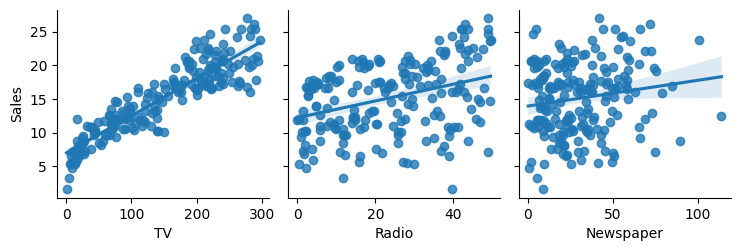

In [ ]:
sns.pairplot(df, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="reg")

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

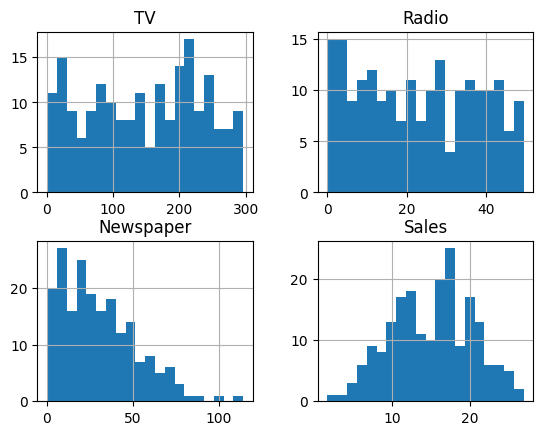

In [ ]:
df.hist(bins=20)

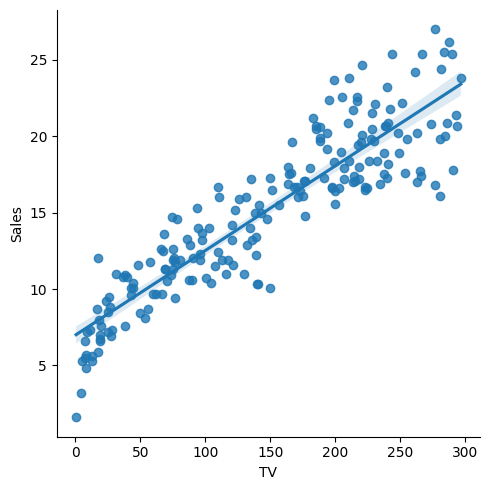

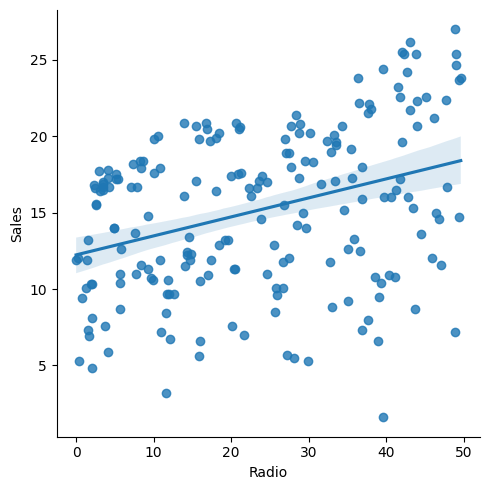

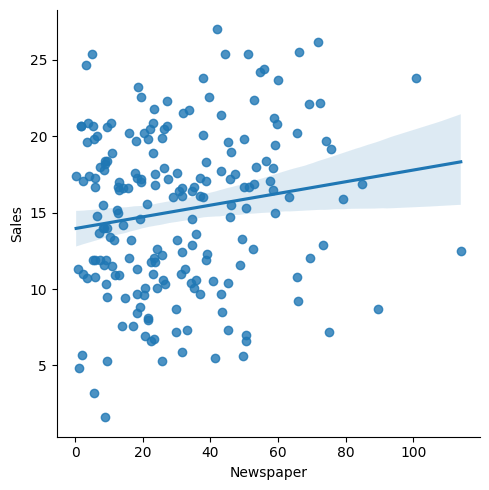

In [ ]:
sns.lmplot(x='TV', y='Sales', data=df)
sns.lmplot(x='Radio', y='Sales', data=df)
sns.lmplot(x='Newspaper',y= 'Sales', data=df)

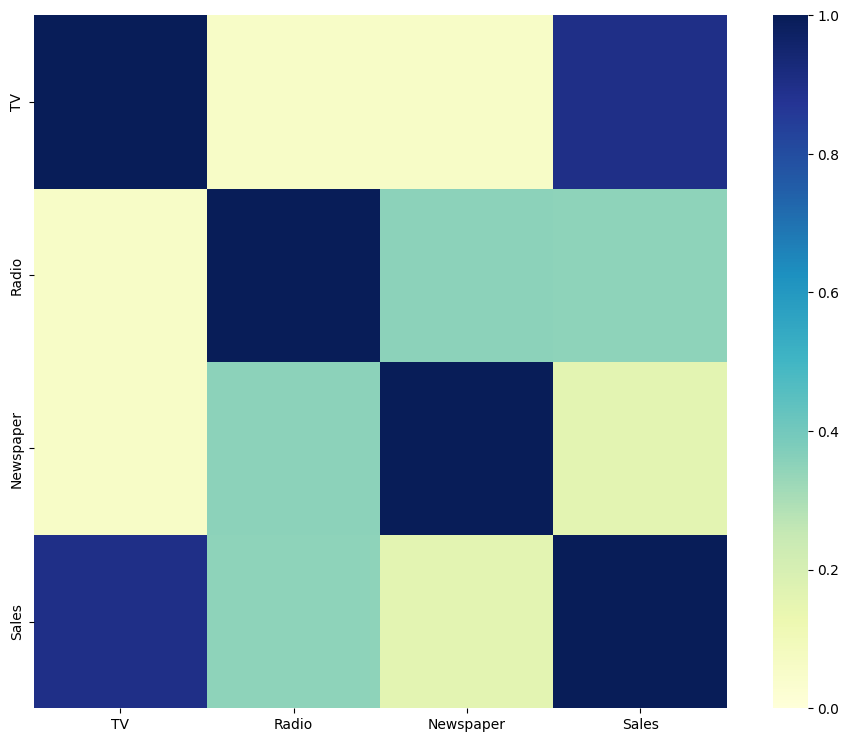

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmin=0, vmax=1, square=True, cmap="YlGnBu", ax=ax)
plt.show()

In [ ]:
X = df.drop('Sales', axis=1)
y = df[["Sales"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)


In [ ]:
lin_model = sm.ols(formula="Sales ~ TV + Radio + Newspaper", data=df).fit()

In [ ]:
print(lin_model.params, "\n")

Intercept    4.625124
TV           0.054446
Radio        0.107001
Newspaper    0.000336
dtype: float64 



In [ ]:
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Tue, 02 Jul 2024   Prob (F-statistic):           8.13e-99
Time:                        08:47:53   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.0

In [ ]:
results = []
names = []

In [ ]:
models = [('LinearRegression', LinearRegression())]

In [ ]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append(result)
    names.append(name)
    msg = "%s: %f" % (name, result)
    print(msg)

LinearRegression: 1.612152


In [ ]:
new_data = pd.DataFrame({'TV': [100], 'Radio': [50], 'Newspaper': [25]})
predicted_sales = lin_model.predict(new_data)
print("Predicted Sales:", predicted_sales)

Predicted Sales: 0    15.428155
dtype: float64


In [ ]:
new_data = pd.DataFrame({'TV': [25], 'Radio': [63], 'Newspaper': [80]})
predicted_sales = lin_model.predict(new_data)
print("Predicted Sales:", predicted_sales)

Predicted Sales: 0    12.754199
dtype: float64
